Abrir nuestro dataframe 

In [1]:
import pandas as pd

df = pd.read_csv('C:\\Users\\jopulgar\\df_extended.csv')


In [8]:
# Importando las bibliotecas necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Vectorización del texto:
# Convertimos el texto en una matriz de características numéricas
# Usamos TfidfVectorizer, que convierte el texto en una matriz TF-IDF.
# Se ignora el inglés "stop words" y se limita el número de características a 500.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_text = tfidf_vectorizer.fit_transform(df['Conversación'])

# Codificación de la columna "Horario":
# Convertimos las categorías 'día' y 'noche' a valores numéricos 0 y 1.
le = LabelEncoder()
X_horario = le.fit_transform(df['Horario']).reshape(-1, 1)

# Combina las características del texto y la columna horario en una sola matriz
X = np.hstack((X_text.toarray(), X_horario))

# Define las etiquetas/target para el entrenamiento
y = df['Label']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Realiza predicciones con el conjunto de prueba
y_pred = knn.predict(X_test)


Exactitud: 0.6666666666666666
Precisión: 0.6848072562358276
Sensibilidad: 0.6666666666666666
Puntuación F1: 0.669717772692601
Matriz de Confusión:


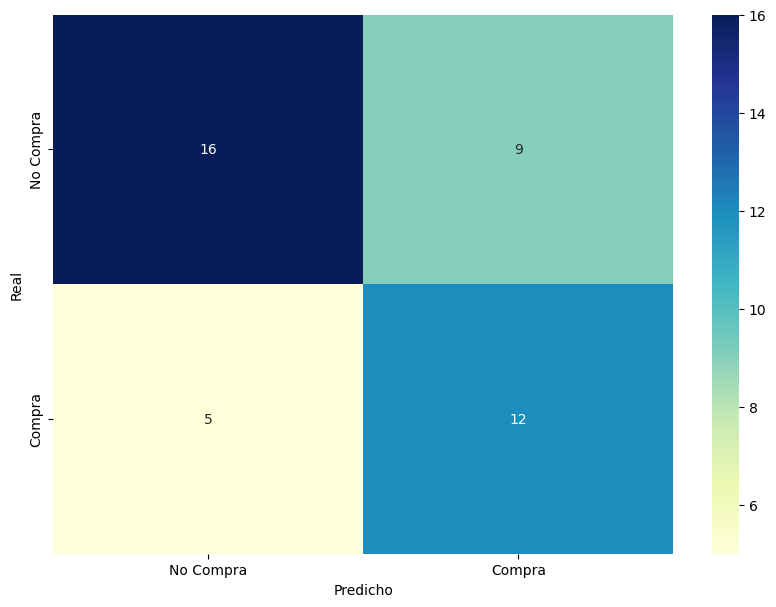

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular métricas
exactitud = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
sensibilidad = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
matriz_confusion = confusion_matrix(y_test, y_pred)

# Etiquetas para la matriz de confusión
etiquetas = ['No Compra', 'Compra']

# Imprimir métricas
print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g", xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


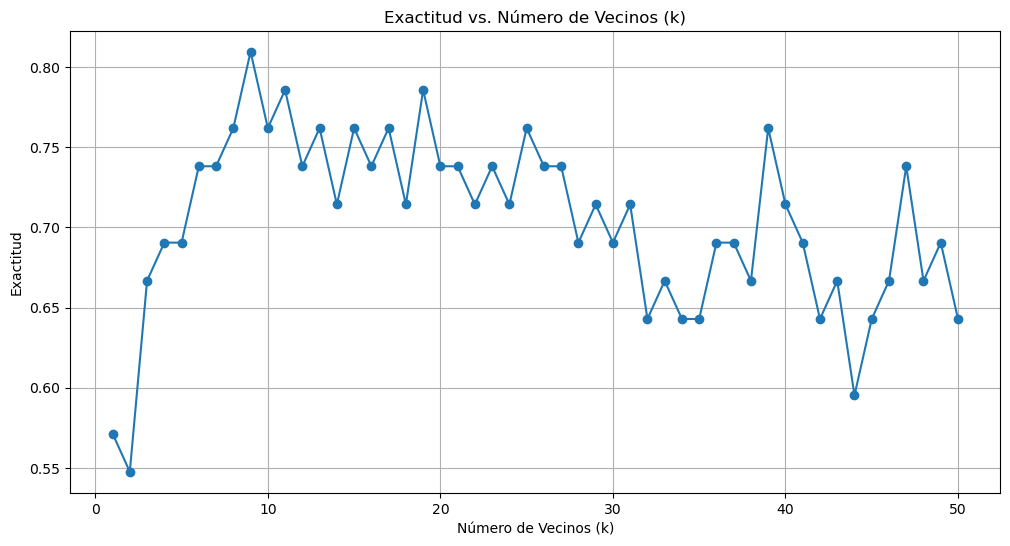

In [10]:
# Definir un rango de valores para "k"
k_values = list(range(1, 51))

# Listas para guardar las exactitudes para cada valor de "k"
accuracies = []

# Para cada valor de "k", entrenar un modelo KNN y evaluar su exactitud
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la exactitud en función de "k"
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Exactitud")
plt.grid(True)
plt.show()


In [13]:
# Importando las bibliotecas necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Vectorización del texto:
# Convertimos el texto en una matriz de características numéricas
# Usamos TfidfVectorizer, que convierte el texto en una matriz TF-IDF.
# Se ignora el inglés "stop words" y se limita el número de características a 500.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_text = tfidf_vectorizer.fit_transform(df['Conversación'])

# Codificación de la columna "Horario":
# Convertimos las categorías 'día' y 'noche' a valores numéricos 0 y 1.
le = LabelEncoder()
X_horario = le.fit_transform(df['Horario']).reshape(-1, 1)

# Combina las características del texto y la columna horario en una sola matriz
X = np.hstack((X_text.toarray(), X_horario))

# Define las etiquetas/target para el entrenamiento
y = df['Label']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Realiza predicciones con el conjunto de prueba
y_pred = knn.predict(X_test)


Exactitud: 0.8095238095238095
Precisión: 0.815843957720388
Sensibilidad: 0.8095238095238095
Puntuación F1: 0.8108465608465609
Matriz de Confusión:


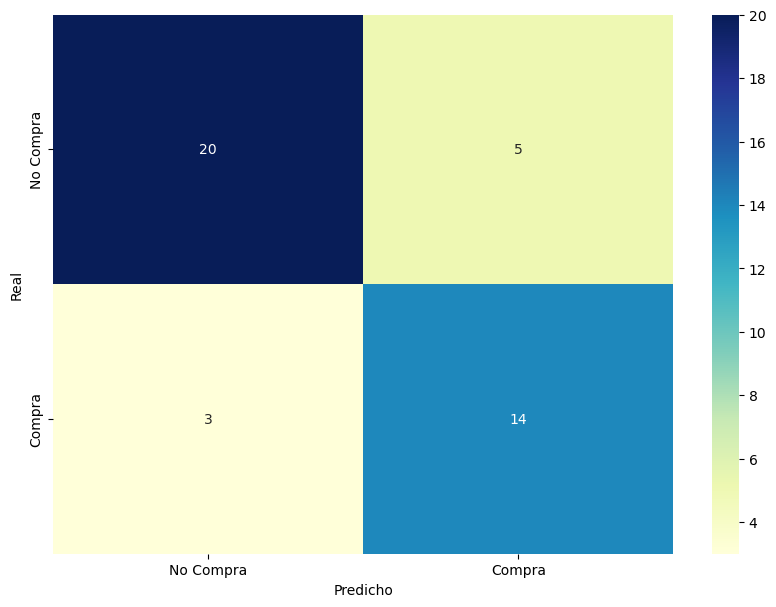

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular métricas
exactitud = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
sensibilidad = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
matriz_confusion = confusion_matrix(y_test, y_pred)

# Etiquetas para la matriz de confusión
etiquetas = ['No Compra', 'Compra']

# Imprimir métricas
print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, cmap="YlGnBu", fmt="g", xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression

# Entrenar una Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Obtener los coeficientes del modelo
coef = logreg.coef_[0]

# Vincular palabras con sus coeficientes
word_coef = list(zip(tfidf_vectorizer.get_feature_names_out(), coef))

# Ordenar por importancia
sorted_word_coef = sorted(word_coef, key=lambda x: x[1], reverse=True)

# Palabras más importantes para la etiqueta "Compra" (label 1)
top_words_compra = sorted_word_coef[:10]

# Palabras más importantes para la etiqueta "No compra" (label 0)
top_words_no_compra = sorted_word_coef[-10:]

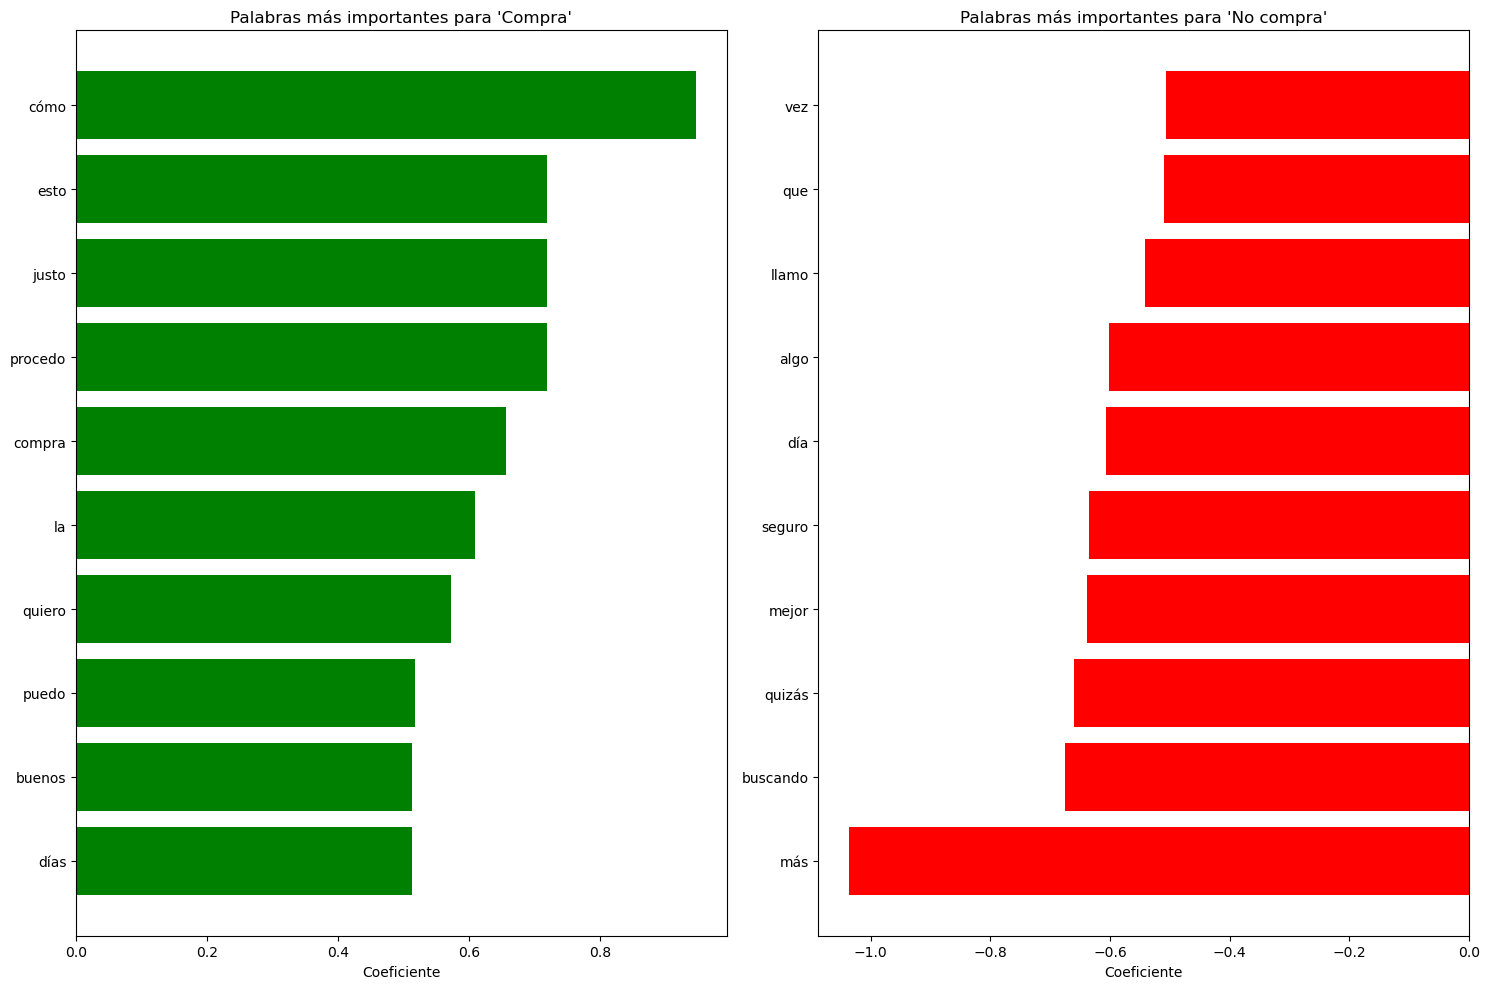

In [16]:
# Crear gráficos de barras para las palabras más importantes
plt.figure(figsize=(15, 10))

# Gráfico para "Compra"
plt.subplot(1, 2, 1)
words, values = zip(*top_words_compra)
plt.barh(words, values, color='green')
plt.title("Palabras más importantes para 'Compra'")
plt.xlabel('Coeficiente')
plt.gca().invert_yaxis()

# Gráfico para "No compra"
plt.subplot(1, 2, 2)
words, values = zip(*top_words_no_compra)
plt.barh(words, values, color='red')
plt.title("Palabras más importantes para 'No compra'")
plt.xlabel('Coeficiente')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_rf = rf.predict(X_test)



(0.4523809523809524,
 '              precision    recall  f1-score   support\n\n           0       0.54      0.56      0.55        25\n           1       0.31      0.29      0.30        17\n\n    accuracy                           0.45        42\n   macro avg       0.43      0.43      0.43        42\nweighted avg       0.45      0.45      0.45        42\n')

Exactitud: 0.4523809523809524
Precisión: 0.4470009157509157
Sensibilidad: 0.4523809523809524
Puntuación F1: 0.4494525082760377
Matriz de Confusión:


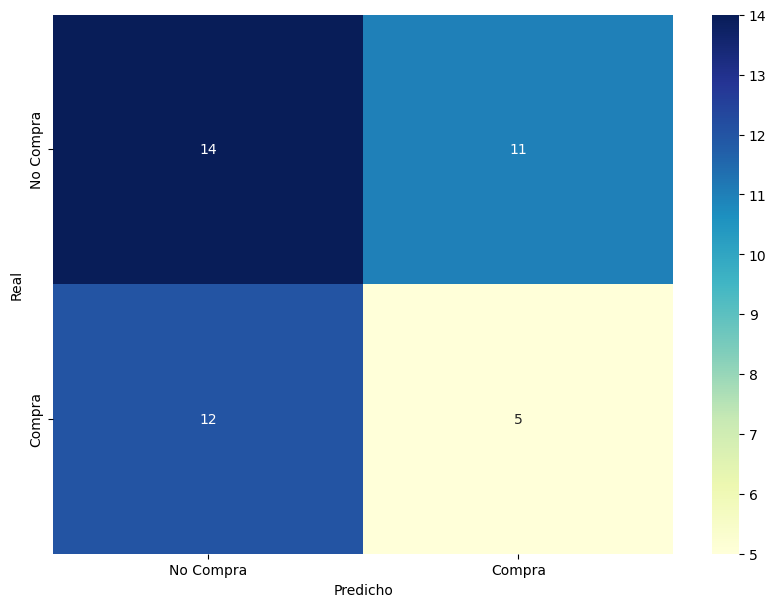

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calcular métricas para el modelo Random Forest
exactitud_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted') 
sensibilidad_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Etiquetas para la matriz de confusión
etiquetas_rf = ['No Compra', 'Compra']

# Imprimir métricas
print(f"Exactitud: {exactitud_rf}")
print(f"Precisión: {precision_rf}")
print(f"Sensibilidad: {sensibilidad_rf}")
print(f"Puntuación F1: {f1_rf}")
print("Matriz de Confusión:")

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion_rf, annot=True, cmap="YlGnBu", fmt="g", xticklabels=etiquetas_rf, yticklabels=etiquetas_rf)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
